In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('jwst.csv')

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,articles-link,articles-link-href,title-selector,summary-selector,whole-article-selector
0,1751563710-1,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,https://webbtelescope.org/contents/news-releas...,Webb Captures Top of Iconic Horsehead Nebula i...,Webb’s new view focuses on the illuminated edg...,NaN
1,1751563710-2,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,https://webbtelescope.org/contents/news-releas...,Webb Captures Top of Iconic Horsehead Nebula i...,The Horsehead Nebula is prancing across the co...,NaN
2,1751563710-3,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,https://webbtelescope.org/contents/news-releas...,Webb Captures Top of Iconic Horsehead Nebula i...,Lee esta historia en español.,NaN
3,1751563710-4,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,https://webbtelescope.org/contents/news-releas...,Webb Captures Top of Iconic Horsehead Nebula i...,NaN,NASA’s James Webb Space Telescope has captured...
4,1751563710-5,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,https://webbtelescope.org/contents/news-releas...,Webb Captures Top of Iconic Horsehead Nebula i...,NaN,Webb’s new images show part of the sky in the ...


In [4]:
# how many rows and columns
df.shape

(950, 7)

In [5]:
# column names
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'articles-link',
       'articles-link-href', 'title-selector', 'summary-selector',
       'whole-article-selector'],
      dtype='object')

In [6]:
# how many unique values in articles-link column and also print those values
df['articles-link'].unique()
df['articles-link'].nunique()

50

In [7]:
# are the columns articles-link and title-selector same?
(df["articles-link"] == df["title-selector"]).all()

np.True_

In [8]:
# remove title selector column and rename articles-link to title
df = df.drop(columns=["title-selector","articles-link-href"])
df = df.rename(columns={"articles-link":"title", "summary-selector":"summary", "whole-article-selector":"whole-article"})

In [9]:
# get those rows where summary is Lee esta historia en español. but whole-article is not null
filtered_rows = df[(df["summary"] == "Lee esta historia en español.") ]

filtered_rows["whole-article"].isna().all()

np.True_

In [10]:
#remove all rows where summary is Lee esta historia en español. but whole-article is not null
df = df.drop(filtered_rows.index).reset_index(drop=True)

In [11]:
# check if there are rows where summary and whole-article are both null
df[(df["summary"].isna()) & (df["whole-article"].isna())]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
736,1751563870-774,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,NaN


In [12]:
# remove rows where summary and whole-article are both null
df = df.drop(df[(df["summary"].isna()) & (df["whole-article"].isna())].index).reset_index(drop=True)

In [13]:
# check if there are rows where whole-article is https://science.nasa.gov/webb
df[df["whole-article"]=="https://science.nasa.gov/webb"]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
692,1751563862-730,https://webbtelescope.org/news/news-releases?i...,NASA Webb's Autopsy of Planet Swallowed by Sta...,NaN,https://science.nasa.gov/webb
713,1751563866-751,https://webbtelescope.org/news/news-releases?i...,"With NASA's Webb, Dying Star's Energetic Displ...",NaN,https://science.nasa.gov/webb
735,1751563870-773,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,https://science.nasa.gov/webb
752,1751563874-791,https://webbtelescope.org/news/news-releases?i...,New Visualization From NASA's Webb Telescope E...,NaN,https://science.nasa.gov/webb
768,1751563878-807,https://webbtelescope.org/news/news-releases?i...,"NASA's Webb Reveals New Details, Mysteries in ...",NaN,https://science.nasa.gov/webb
790,1751563882-829,https://webbtelescope.org/news/news-releases?i...,Webb's Titan Forecast: Partly Cloudy With Occa...,NaN,https://science.nasa.gov/webb
810,1751563886-849,https://webbtelescope.org/news/news-releases?i...,Another First: NASA Webb Identifies Frozen Wat...,NaN,https://science.nasa.gov/webb
828,1751563890-867,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Rounds Out Picture of Sombrero Gal...,NaN,https://science.nasa.gov/webb
854,1751563894-893,https://webbtelescope.org/news/news-releases?i...,Frigid Exoplanet in Strange Orbit Imaged by NA...,NaN,https://science.nasa.gov/webb
870,1751563898-909,https://webbtelescope.org/news/news-releases?i...,Likely Saturn-Mass Planet Imaged by NASA Webb ...,NaN,https://science.nasa.gov/webb


In [14]:
df = df.drop(df[df["whole-article"]=="https://science.nasa.gov/webb"].index).reset_index(drop=True)

In [15]:
# check if there are rows where whole-article is To learn more about Webb, visit:
df[df["whole-article"] == "To learn more about Webb, visit:"]

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
691,1751563862-729,https://webbtelescope.org/news/news-releases?i...,NASA Webb's Autopsy of Planet Swallowed by Sta...,NaN,"To learn more about Webb, visit:"
711,1751563866-750,https://webbtelescope.org/news/news-releases?i...,"With NASA's Webb, Dying Star's Energetic Displ...",NaN,"To learn more about Webb, visit:"
732,1751563870-772,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"To learn more about Webb, visit:"
748,1751563874-790,https://webbtelescope.org/news/news-releases?i...,New Visualization From NASA's Webb Telescope E...,NaN,"To learn more about Webb, visit:"
763,1751563878-806,https://webbtelescope.org/news/news-releases?i...,"NASA's Webb Reveals New Details, Mysteries in ...",NaN,"To learn more about Webb, visit:"
784,1751563882-828,https://webbtelescope.org/news/news-releases?i...,Webb's Titan Forecast: Partly Cloudy With Occa...,NaN,"To learn more about Webb, visit:"
803,1751563886-848,https://webbtelescope.org/news/news-releases?i...,Another First: NASA Webb Identifies Frozen Wat...,NaN,"To learn more about Webb, visit:"
820,1751563890-866,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Rounds Out Picture of Sombrero Gal...,NaN,"To learn more about Webb, visit:"
845,1751563894-892,https://webbtelescope.org/news/news-releases?i...,Frigid Exoplanet in Strange Orbit Imaged by NA...,NaN,"To learn more about Webb, visit:"
860,1751563898-908,https://webbtelescope.org/news/news-releases?i...,Likely Saturn-Mass Planet Imaged by NASA Webb ...,NaN,"To learn more about Webb, visit:"


In [16]:
df = df.drop(df[df["whole-article"]=="To learn more about Webb, visit:"].index).reset_index(drop=True)

In [17]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'title', 'summary',
       'whole-article'],
      dtype='object')

In [18]:
df["title"].nunique()

50

C:\Users\HP\AppData\Local\Temp\ipykernel_17516\3397680982.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


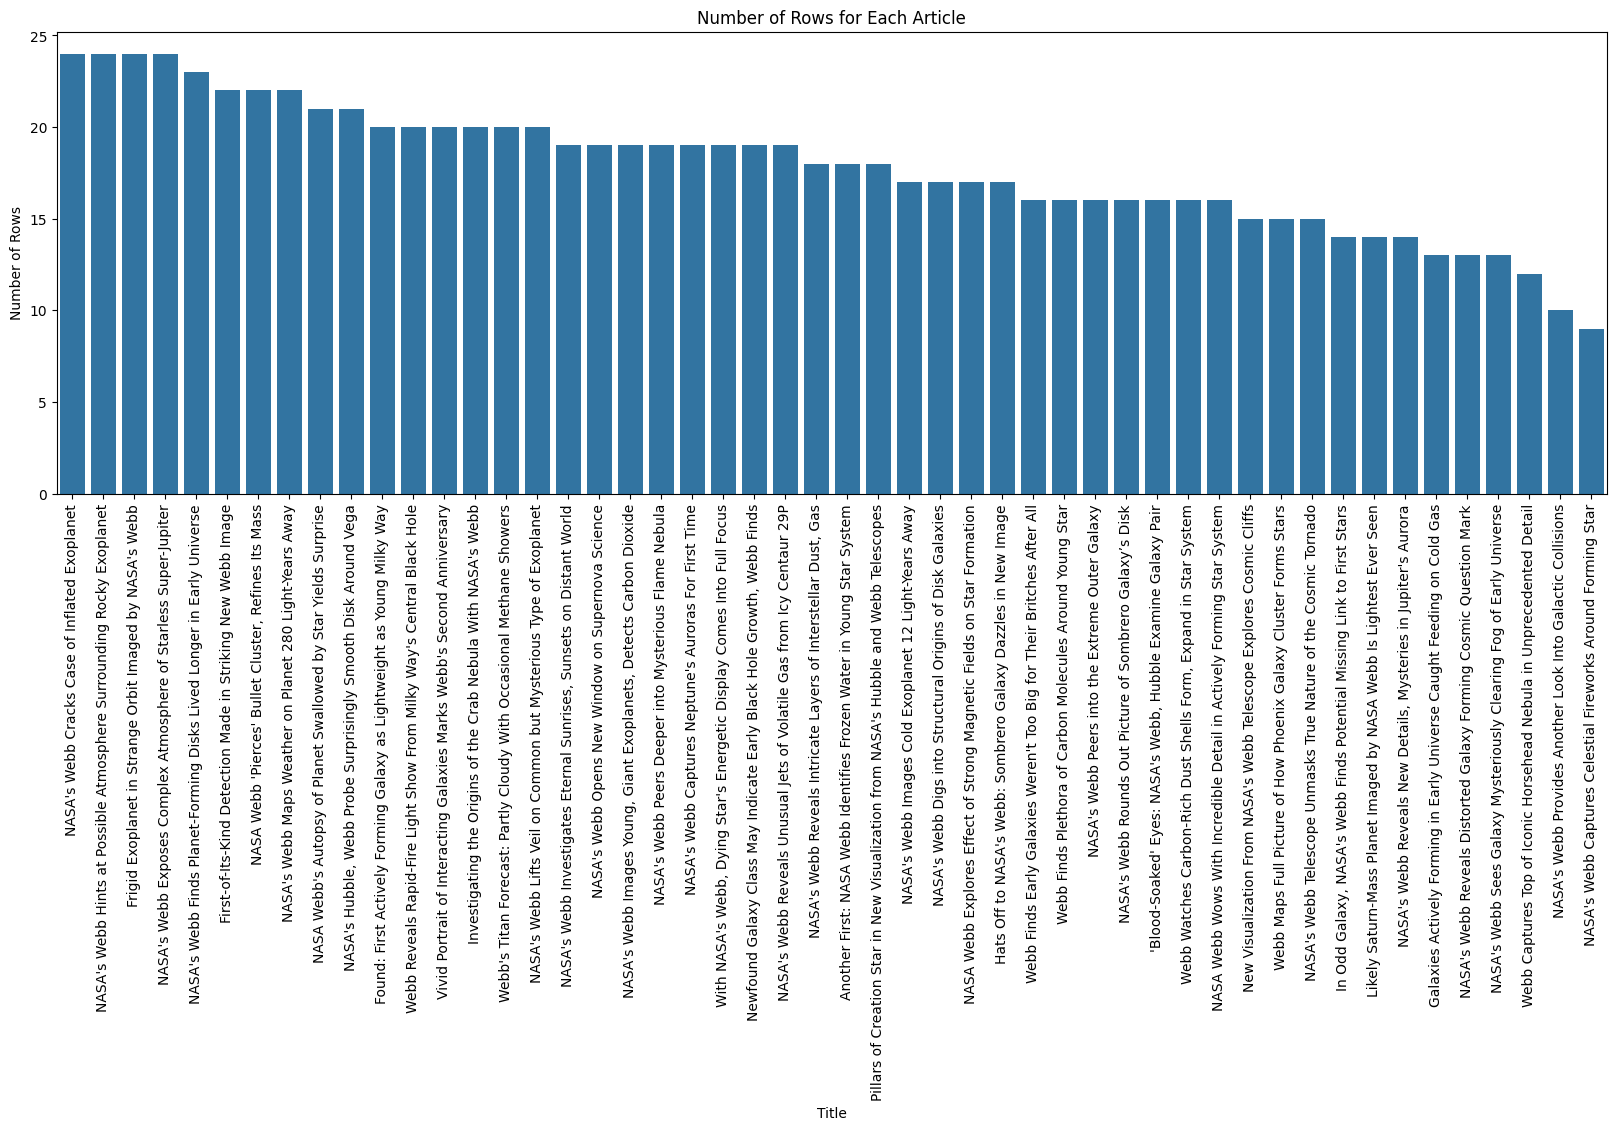

In [19]:
# now we are going to plot the number of rows for each article
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df["title"].value_counts() # this will give us the count or number of rows taken up by each
plt.figure(figsize=(20, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Title") 
plt.ylabel("Number of Rows")
plt.title("Number of Rows for Each Article")
plt.tight_layout()
plt.show()


In [20]:
# now let's take a title
title="NASA's Webb Lifts Veil on Common but Mysterious Type of Exoplanet"
#print rows where title is this
current_title_df = df[df["title"] == title]
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
710,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN
711,1751563870-753,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Much smaller than gas-giants and typically coo...,NaN
712,1751563870-754,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,"Adding to the mystery, many sub-Neptunes appea...",NaN
713,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne..."
714,1751563870-756,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“I had been waiting my entire career for Webb ...
715,1751563870-757,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The existence of sub-Neptunes was unexpected b...
716,1751563870-758,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Before Webb, scientists had very little inform..."
717,1751563870-759,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,A key finding prior to Webb was that most sub-...
718,1751563870-760,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"“Why did we observe this planet, TOI-421 b? It..."
719,1751563870-761,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"That temperature threshold is about 1,070 degr..."


In [21]:
# first merge all rows where summary exists and whole-article-selector is null

# first we filter the rows where summary exists
filtered_rows = current_title_df[current_title_df["summary"].notnull() & current_title_df["whole-article"].isna()]
filtered_rows

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
710,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN
711,1751563870-753,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Much smaller than gas-giants and typically coo...,NaN
712,1751563870-754,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,"Adding to the mystery, many sub-Neptunes appea...",NaN


In [22]:
# then we combine the summaries of these rows into a single summary
merged_summary = " ".join(filtered_rows["summary"].astype(str))
print("Merged Summary:")
print(merged_summary)

Merged Summary:
Scientists determine atmospheric makeup of small, hot, gassy sub-Neptune. Much smaller than gas-giants and typically cooler than hot Jupiters, sub-Neptunes were extremely challenging to observe before the launch of NASA’s James Webb Space Telescope. Though they appear to be the most common type of exoplanet in our galaxy, you won’t find them in our solar system. Astronomers are trying to understand how these planets formed and evolved, why they are so common, and why they don’t orbit our Sun. Adding to the mystery, many sub-Neptunes appear to be very highly obscured by clouds and hazes, which have made it impossible to determine their atmospheric makeup. Now, by using Webb to study the hot sub-Neptune TOI-421 b, scientists have uncovered the chemical fingerprints of its atmosphere. Did this exoplanet form and evolve differently from the cooler, sub-Neptunes observed previously? Do TOI-421 b’s differences indicate a new classification of hot sub-Neptunes, or is it just t

In [23]:
# copy the first filtered row into a new variable
merged_row = filtered_rows.iloc[0].copy()
# update the summary of this row with the merged summary
merged_row["summary"] = merged_summary
print("Merged Row:")
merged_row
merged_row_frame = merged_row.to_frame().T
merged_row_frame


Merged Row:


,web-scraper-order,web-scraper-start-url,title,summary,whole-article
710,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN


In [24]:
filtered_rows.index

Index([710, 711, 712], dtype='int64')

In [25]:
filtered_rows

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
710,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN
711,1751563870-753,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Much smaller than gas-giants and typically coo...,NaN
712,1751563870-754,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,"Adding to the mystery, many sub-Neptunes appea...",NaN


In [26]:
# drop the filtered rows from the original dataframe using their indexes
current_title_df = current_title_df.drop(filtered_rows.index).reset_index(drop=True)

In [27]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne..."
1,1751563870-756,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“I had been waiting my entire career for Webb ...
2,1751563870-757,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The existence of sub-Neptunes was unexpected b...
3,1751563870-758,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Before Webb, scientists had very little inform..."
4,1751563870-759,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,A key finding prior to Webb was that most sub-...
5,1751563870-760,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"“Why did we observe this planet, TOI-421 b? It..."
6,1751563870-761,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"That temperature threshold is about 1,070 degr..."
7,1751563870-762,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"The temperature of TOI-421 b is about 1,340 de..."
8,1751563870-763,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“We saw spectral features that we attribute to...
9,1751563870-764,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The team found water vapor in the planet’s atm...


In [28]:
# concat the merged row to the current_title_df
current_title_df = pd.concat([current_title_df, merged_row.to_frame().T], ignore_index=True)

In [29]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne..."
1,1751563870-756,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“I had been waiting my entire career for Webb ...
2,1751563870-757,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The existence of sub-Neptunes was unexpected b...
3,1751563870-758,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Before Webb, scientists had very little inform..."
4,1751563870-759,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,A key finding prior to Webb was that most sub-...
5,1751563870-760,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"“Why did we observe this planet, TOI-421 b? It..."
6,1751563870-761,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"That temperature threshold is about 1,070 degr..."
7,1751563870-762,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"The temperature of TOI-421 b is about 1,340 de..."
8,1751563870-763,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“We saw spectral features that we attribute to...
9,1751563870-764,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The team found water vapor in the planet’s atm...


In [30]:
# now for places where summary is null, whole article is not null, 
# we will take the whole article value from each row and put it in a 
# column called paragraph-${number (variable)} and number the paragraph as well
count=1
filtered_rows = current_title_df[current_title_df["summary"].isnull() & current_title_df["whole-article"].notnull()]
# indexes of filtered rows
filtered_rows


    

,web-scraper-order,web-scraper-start-url,title,summary,whole-article
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne..."
1,1751563870-756,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“I had been waiting my entire career for Webb ...
2,1751563870-757,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The existence of sub-Neptunes was unexpected b...
3,1751563870-758,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Before Webb, scientists had very little inform..."
4,1751563870-759,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,A key finding prior to Webb was that most sub-...
5,1751563870-760,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"“Why did we observe this planet, TOI-421 b? It..."
6,1751563870-761,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"That temperature threshold is about 1,070 degr..."
7,1751563870-762,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"The temperature of TOI-421 b is about 1,340 de..."
8,1751563870-763,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,“We saw spectral features that we attribute to...
9,1751563870-764,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,The team found water vapor in the planet’s atm...


In [31]:
print(filtered_rows.index)
print(filtered_rows.index.__len__())
last_index = filtered_rows.index.__len__() - 1
print(last_index)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')
17
16


In [32]:
# choose the first row of filtered_rows as the base row that we will modify
base_row_index = filtered_rows.index[0]
current_title_df.loc[base_row_index]

web-scraper-order                                           1751563870-755
web-scraper-start-url    https://webbtelescope.org/news/news-releases?i...
title                    NASA's Webb Lifts Veil on Common but Mysteriou...
summary                                                                NaN
whole-article            Though they don’t orbit around our Sun, sub-Ne...
Name: 0, dtype: object

In [33]:
for index, row in current_title_df[current_title_df["summary"].isnull() & current_title_df["whole-article"].notnull()].iterrows():
    # get the value of whole-article in that row
    whole_article = row["whole-article"]
    # concat a column in the base row called named para-${count}, and its value will be the whole_article
    current_title_df.loc[base_row_index, f"para-{count}"] = whole_article
    count += 1

# then remove all rows which are in filtered_rows and are not the base row and the summary is null
current_title_df = current_title_df.drop(filtered_rows.index[1:]).reset_index(drop=True)
# then remove the whole-article column


In [34]:
current_title_df
# now current title df has the summary in one row and all paragraphs in the same row

,web-scraper-order,web-scraper-start-url,title,summary,whole-article,para-1,para-2,para-3,para-4,para-5,...,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne...","Though they don’t orbit around our Sun, sub-Ne...",“I had been waiting my entire career for Webb ...,The existence of sub-Neptunes was unexpected b...,"Before Webb, scientists had very little inform...",A key finding prior to Webb was that most sub-...,...,"The temperature of TOI-421 b is about 1,340 de...",“We saw spectral features that we attribute to...,The team found water vapor in the planet’s atm...,The lightweight hydrogen atmosphere was the bi...,The hydrogen-dominated atmosphere is also inte...,Aside from being hotter than other sub-Neptune...,Is TOI-421b emblematic of hot sub-Neptunes orb...,“We've unlocked a new way to look at these sub...,The team’s findings appear May 5 in The Astrop...,The James Webb Space Telescope is the world’s ...
1,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
current_title_df = current_title_df.drop(columns=["whole-article"])

In [36]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,NaN,"Though they don’t orbit around our Sun, sub-Ne...",“I had been waiting my entire career for Webb ...,The existence of sub-Neptunes was unexpected b...,"Before Webb, scientists had very little inform...",A key finding prior to Webb was that most sub-...,"“Why did we observe this planet, TOI-421 b? It...",...,"The temperature of TOI-421 b is about 1,340 de...",“We saw spectral features that we attribute to...,The team found water vapor in the planet’s atm...,The lightweight hydrogen atmosphere was the bi...,The hydrogen-dominated atmosphere is also inte...,Aside from being hotter than other sub-Neptune...,Is TOI-421b emblematic of hot sub-Neptunes orb...,“We've unlocked a new way to look at these sub...,The team’s findings appear May 5 in The Astrop...,The James Webb Space Telescope is the world’s ...
1,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Replace the summary of first row with the summary of second row
current_title_df.iloc[0, current_title_df.columns.get_loc('summary')] = current_title_df.iloc[1]['summary']


In [38]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,"Though they don’t orbit around our Sun, sub-Ne...",“I had been waiting my entire career for Webb ...,The existence of sub-Neptunes was unexpected b...,"Before Webb, scientists had very little inform...",A key finding prior to Webb was that most sub-...,"“Why did we observe this planet, TOI-421 b? It...",...,"The temperature of TOI-421 b is about 1,340 de...",“We saw spectral features that we attribute to...,The team found water vapor in the planet’s atm...,The lightweight hydrogen atmosphere was the bi...,The hydrogen-dominated atmosphere is also inte...,Aside from being hotter than other sub-Neptune...,Is TOI-421b emblematic of hot sub-Neptunes orb...,“We've unlocked a new way to look at these sub...,The team’s findings appear May 5 in The Astrop...,The James Webb Space Telescope is the world’s ...
1,1751563870-752,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# drop the second row as it is now redundant
current_title_df = current_title_df.drop(current_title_df.index[1]).reset_index(drop=True)

In [40]:
current_title_df

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-8,para-9,para-10,para-11,para-12,para-13,para-14,para-15,para-16,para-17
0,1751563870-755,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Lifts Veil on Common but Mysteriou...,Scientists determine atmospheric makeup of sma...,"Though they don’t orbit around our Sun, sub-Ne...",“I had been waiting my entire career for Webb ...,The existence of sub-Neptunes was unexpected b...,"Before Webb, scientists had very little inform...",A key finding prior to Webb was that most sub-...,"“Why did we observe this planet, TOI-421 b? It...",...,"The temperature of TOI-421 b is about 1,340 de...",“We saw spectral features that we attribute to...,The team found water vapor in the planet’s atm...,The lightweight hydrogen atmosphere was the bi...,The hydrogen-dominated atmosphere is also inte...,Aside from being hotter than other sub-Neptune...,Is TOI-421b emblematic of hot sub-Neptunes orb...,“We've unlocked a new way to look at these sub...,The team’s findings appear May 5 in The Astrop...,The James Webb Space Telescope is the world’s ...


In [41]:
# now we did this for one title only, we can do this for all titles by running a loop on the df 
for title in df["title"].unique():
    printing = False
    title_rows_df = df[df["title"] == title]

    ### MERGE SUMMARIES ###
    summary_exists_df = title_rows_df[title_rows_df["summary"].notnull() & title_rows_df["whole-article"].isna()]
    
    if len(summary_exists_df) > 0:
        # then we merge the summaries of these rows into a single summary
        merged_summary = " ".join(summary_exists_df["summary"].astype(str))
        # copy the first filtered summary exists row into a new variable
        merged_row = summary_exists_df.iloc[0].copy()
        # update the summary of this row with the merged summary
        merged_row["summary"] = merged_summary
        # drop the filtered summary rows from the original dataframe using their indexes
        title_rows_df = title_rows_df.drop(summary_exists_df.index).reset_index(drop=True)
        # concat the merged row to the title_rows_df
        title_rows_df = pd.concat([title_rows_df, merged_row.to_frame().T], ignore_index=True)
    

    #### MERGE WHOLE ARTICLE PARAGRAPHS ###

    # now for places where summary is null, whole article is not null,
    # we will take the whole article value from each row and put it in a
    # column called paragraph-${number (variable)} and number the paragraph as well
    whole_article_exists_df = title_rows_df[title_rows_df["summary"].isnull() & title_rows_df["whole-article"].notnull()]
    # choose the first row of whole_article_exists_df as the base row that we will modify
    if len(whole_article_exists_df) > 0:
        count = 1
        base_row_index = whole_article_exists_df.index[0]
        for index, row in whole_article_exists_df.iterrows():
            # get the value of whole-article in that row
            whole_article = row["whole-article"]
            # concat a column in the base row called named para-${count}, and its value will be the whole_article
            title_rows_df.loc[base_row_index, f"para-{count}"] = whole_article
            count += 1

        # then remove all rows which are in whole_article_exists_df and are not the base row and the summary is null
        title_rows_df = title_rows_df.drop(whole_article_exists_df.index[1:]).reset_index(drop=True)
        # then remove the whole-article column
        title_rows_df = title_rows_df.drop(columns=["whole-article"])

        ### FINAL CLEANUP TO ENSURE ONE ROW ###
        # Identify the row that has paragraph columns
        paragraph_row = title_rows_df[
            title_rows_df.filter(like="para-").notnull().any(axis=1)
        ]

        # Identify the row that has merged summary
        summary_row = title_rows_df[
            title_rows_df["summary"].notnull() & title_rows_df.filter(like="para-").isna().all(axis=1)
        ]

        # Ensure both rows exist
        if len(paragraph_row) == 1 and len(summary_row) == 1:
            # Get their indices
            para_idx = paragraph_row.index[0]
            summary_idx = summary_row.index[0]

            # Replace summary of para row with merged summary
            title_rows_df.loc[para_idx, "summary"] = title_rows_df.loc[summary_idx, "summary"]

            # Drop the old summary-only row
            title_rows_df = title_rows_df.drop(summary_idx).reset_index(drop=True)

    # Now we have processed the title_rows_df for this title, we need to update the main df
    # Remove old rows for this title from df
    df = df[df["title"] != title]
    # Append modified rows back into df
    df = pd.concat([df, title_rows_df], ignore_index=True)

In [42]:
df.head()

,web-scraper-order,web-scraper-start-url,title,summary,whole-article,para-1,para-2,para-3,para-4,para-5,...,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19,para-20,para-21
0,1751563710-4,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,Webb’s new view focuses on the illuminated edg...,NaN,NASA’s James Webb Space Telescope has captured...,Webb’s new images show part of the sky in the ...,The nebula formed from a collapsing interstell...,The Horsehead Nebula is a well-known photodiss...,These regions occur where interstellar gas is ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751563714-17,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Maps Weather on Planet 280 Light-Y...,WASP-43 b is cloudy on the nightside and clear...,NaN,An international team of researchers has succe...,Precise brightness measurements over a broad s...,The investigation is just the latest demonstra...,WASP-43 b is a “hot Jupiter” type of exoplanet...,"With such a tight orbit, the planet is tidally...",...,“The fact that we can map temperature in this ...,"To interpret the map, the team used complex 3D...",The broad spectrum of mid-infrared light captu...,The spectra show clear signs of water vapor on...,"Surprisingly, the data also shows a distinct l...",“The fact that we don't see methane tells us t...,The team thinks that because of this wind-driv...,The MIRI observation of WASP-43 b was conducte...,The James Webb Space Telescope is the world's ...,NaN
2,1751563718-42,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Hints at Possible Atmosphere Surro...,Gas bubbling up from a lava-covered surface on...,NaN,Researchers using NASA’s James Webb Space Tele...,Renyu Hu from NASA’s Jet Propulsion Laboratory...,"55 Cancri e, also known as Janssen, is one of ...","To describe 55 Cancri e as “rocky,” however, c...",In spite of numerous observations since it was...,...,"This method, known as secondary eclipse spectr...",The first indication that 55 Cancri e could ha...,"“Instead, the MIRI data showed a relatively lo...","When the team looked at the NIRCam data, they ...",“We’ve spent the last ten years modelling diff...,The team thinks that the gases blanketing 55 C...,While 55 Cancri e is far too hot to be habitab...,This research was conducted as part of Webb’s ...,The James Webb Space Telescope is the world’s ...,NaN
3,1751563722-66,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Cracks Case of Inflated Exoplanet,A surprising deficiency of methane suggests th...,NaN,Why is the warm gas-giant exoplanet WASP-107 b...,Data collected using NASA’s James Webb Space T...,The unexpectedly high temperature is thought t...,"The results, which were made possible by Webb’...",At more than three-quarters the volume of Jupi...,...,Both spectra show a surprisingly lack of metha...,“This is evidence that hot gas from deep in th...,A likely source of WASP-107 b’s extra internal...,Researchers had previously proposed that tidal...,Once they established that the planet has enou...,"“If we know how much energy is in the planet, ...",It turns out that the core is at least twice a...,"All together, WASP-107 b is not as mysterious ...",“The Webb data tells us that planets like WASP...,The James Webb Space Telescope is the world's ...
4,1751563726-90,https://webbtelescope.org/news/news-releases?i...,Galaxies Actively Forming in Early Universe Ca...,Only Webb can detect and investigate these gal...,NaN,Researchers analyzing data from NASA’s James W...,“These galaxies are like sparkling islands in ...,“We’re moving away from a picture of galaxies ...,"In Webb’s images, the galaxies look like faint...",The universe was a very different place severa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = df.drop(columns=["whole-article"])

In [44]:
df.head()

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19,para-20,para-21
0,1751563710-4,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,Webb’s new view focuses on the illuminated edg...,NASA’s James Webb Space Telescope has captured...,Webb’s new images show part of the sky in the ...,The nebula formed from a collapsing interstell...,The Horsehead Nebula is a well-known photodiss...,These regions occur where interstellar gas is ...,Due to its proximity and its nearly edge-on ge...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751563714-17,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Maps Weather on Planet 280 Light-Y...,WASP-43 b is cloudy on the nightside and clear...,An international team of researchers has succe...,Precise brightness measurements over a broad s...,The investigation is just the latest demonstra...,WASP-43 b is a “hot Jupiter” type of exoplanet...,"With such a tight orbit, the planet is tidally...","Since its discovery in 2011, WASP-43 b has bee...",...,“The fact that we can map temperature in this ...,"To interpret the map, the team used complex 3D...",The broad spectrum of mid-infrared light captu...,The spectra show clear signs of water vapor on...,"Surprisingly, the data also shows a distinct l...",“The fact that we don't see methane tells us t...,The team thinks that because of this wind-driv...,The MIRI observation of WASP-43 b was conducte...,The James Webb Space Telescope is the world's ...,NaN
2,1751563718-42,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Hints at Possible Atmosphere Surro...,Gas bubbling up from a lava-covered surface on...,Researchers using NASA’s James Webb Space Tele...,Renyu Hu from NASA’s Jet Propulsion Laboratory...,"55 Cancri e, also known as Janssen, is one of ...","To describe 55 Cancri e as “rocky,” however, c...",In spite of numerous observations since it was...,“I’ve worked on this planet for more than a de...,...,"This method, known as secondary eclipse spectr...",The first indication that 55 Cancri e could ha...,"“Instead, the MIRI data showed a relatively lo...","When the team looked at the NIRCam data, they ...",“We’ve spent the last ten years modelling diff...,The team thinks that the gases blanketing 55 C...,While 55 Cancri e is far too hot to be habitab...,This research was conducted as part of Webb’s ...,The James Webb Space Telescope is the world’s ...,NaN
3,1751563722-66,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Cracks Case of Inflated Exoplanet,A surprising deficiency of methane suggests th...,Why is the warm gas-giant exoplanet WASP-107 b...,Data collected using NASA’s James Webb Space T...,The unexpectedly high temperature is thought t...,"The results, which were made possible by Webb’...",At more than three-quarters the volume of Jupi...,"“Based on its radius, mass, age, and assumed i...",...,Both spectra show a surprisingly lack of metha...,“This is evidence that hot gas from deep in th...,A likely source of WASP-107 b’s extra internal...,Researchers had previously proposed that tidal...,Once they established that the planet has enou...,"“If we know how much energy is in the planet, ...",It turns out that the core is at least twice a...,"All together, WASP-107 b is not as mysterious ...",“The Webb data tells us that planets like WASP...,The James Webb Space Telescope is the world's ...
4,1751563726-90,https://webbtelescope.org/news/news-releases?i...,Galaxies Actively Forming in Early Universe Ca...,Only Webb can detect and investigate these gal...,Researchers analyzing data from NASA’s James W...,“These galaxies are like sparkling islands in ...,“We’re moving away from a picture of galaxies ...,"In Webb’s images, the galaxies look like faint...",The universe was a very different place severa...,By matching Webb’s data to models of star form...,..

C:\Users\HP\AppData\Local\Temp\ipykernel_17516\3377847091.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


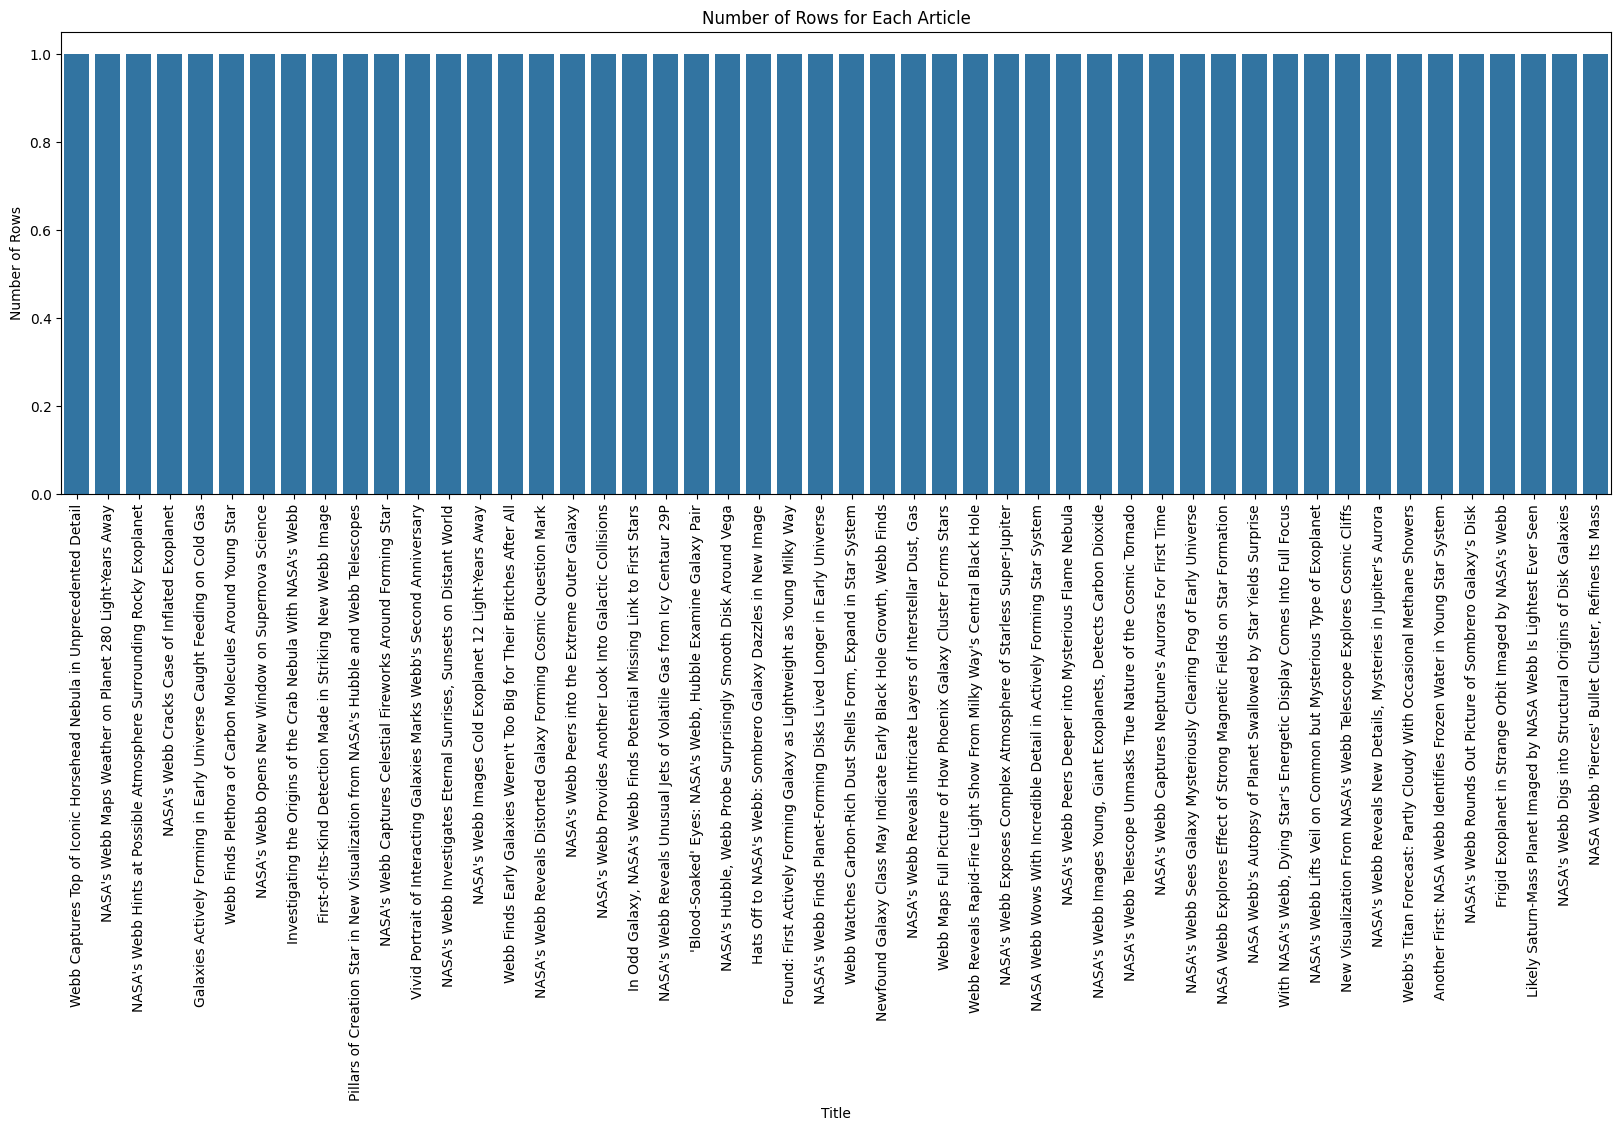

In [45]:
# now check again the number of unique titles and rows for each title
# now we are going to plot the number of rows for each article
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df["title"].value_counts() # this will give us the count or number of rows taken up by each
plt.figure(figsize=(20, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Title") 
plt.ylabel("Number of Rows")
plt.title("Number of Rows for Each Article")
plt.tight_layout()
plt.show()


In [46]:
# return those rows where title is repeated
repeated_titles = df[df.duplicated(subset=["title"], keep=False)]
repeated_titles

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19,para-20,para-21


In [47]:
# check if there are rows where summary is null
df[df["summary"].isnull() | df["para-1"].isnull() | df["title"].isnull()]

,web-scraper-order,web-scraper-start-url,title,summary,para-1,para-2,para-3,para-4,para-5,para-6,...,para-12,para-13,para-14,para-15,para-16,para-17,para-18,para-19,para-20,para-21


In [48]:
# total 21 para columns exist, make these into 7 columns

for i in range(1,22,3):
    current_col = f"para-{i}"
    next_col = f"para-{i+1}"
    next_next_col = f"para-{i+2}"
    group_num = (i - 1) // 3 + 1
    new_content = df[current_col].fillna('') + ' ' + df[next_col].fillna('') + ' ' + df[next_next_col].fillna('')
    df[f"content-{group_num}"] = new_content
    # drop the current_col, next_col, next_next_col
    df = df.drop(columns=[current_col, next_col, next_next_col])


In [49]:
df.sample(10)

,web-scraper-order,web-scraper-start-url,title,summary,content-1,content-2,content-3,content-4,content-5,content-6,content-7
44,1751563886-834,https://webbtelescope.org/news/news-releases?i...,Another First: NASA Webb Identifies Frozen Wat...,Researchers found water ice throughout a dusty...,Is frozen water scattered in systems around ot...,All the frozen water Webb detected is paired w...,"The star, cataloged HD 181327, is significantl...",Water ice isn’t spread evenly throughout this ...,The researchers observed HD 181327 with Webb’s...,,
14,1751563767-274,https://webbtelescope.org/news/news-releases?i...,Webb Finds Early Galaxies Weren't Too Big for ...,It got called the crisis in cosmology. But now...,When astronomers got their first glimpses of g...,The evidence was provided by Webb’s Cosmic Evo...,"Although they’ve settled the main dilemma, a l...","Concurrently, astronomers have been analyzing ...",The James Webb Space Telescope is the world’s ...,,
24,1751563807-447,https://webbtelescope.org/news/news-releases?i...,NASA's Webb Finds Planet-Forming Disks Lived L...,New data confirms Hubble finding and refutes c...,NASA’s James Webb Space Telescope just solved ...,"“With Webb, we have a really strong confirmati...","To test this idea, scientists trained Webb on ...","Now, thanks to Webb’s sensitivity and resoluti...",The researchers explained that there could be ...,"“With more matter around the stars, the accret...",The Hubble Space Telescope has been operating ...
25,1751563811-470,https://webbtelescope.org/news/news-releases?i...,"Webb Watches Carbon-Rich Dust Shells Form, Exp...",The telescope shows that the winds of two mass...,Astronomers have long tried to track down how ...,Every shell is racing away from the stars at m...,“Mid-infrared observations are absolutely cruc...,Though no one can predict with any certainty w...,The James Webb Space Telescope is the world’s ...,,
46,1751563894-873,https://webbtelescope.org/news/news-releases?i...,Frigid Exoplanet in Strange Orbit Imaged by NA...,First image ever taken of exoplanet in extreme...,"A planetary system described as abnormal, chao...","“The colder an exoplanet, the harder it is to ...",This is the first time an image has ever been ...,Understanding the Planet’s Characteristics Wit...,The planet’s brightness at 4.4 microns measure...,"“This exoplanet is so cold, the best compariso...",The James Webb Space Telescope is the world’s ...
41,1751563874-778,https://webbtelescope.org/news/news-releases?i...,New Visualization From NASA's Webb Telescope E...,Iconic Webb image transforms into a 3D landsca...,"In July 2022, NASA’s James Webb Space Telescop...",Ultraviolet light and stellar winds from the s...,Produced for NASA by the Space Telescope Scien...,NASA’s Universe of Learning materials are base...,,,
29,1751563827-542,https://webbtelescope.org/news/news-releases?i...,Webb Reveals Rapid-Fire Light Show From Milky ...,Observations revealed ongoing fireworks featur...,The supermassive black hole at the center of t...,The study published in the Feb. 18 issue of Th...,"While the team expected to see flares, Sagitta...","Yusef-Zadeh attributes the big, bright flares ...",“This is the first time we have seen a time de...,“When you are looking at such weak flaring eve...,
0,1751563710-4,https://webbtelescope.org/news/news-releases?i...,Webb Captures Top of Iconic Horsehead Nebula i...,Webb’s new view focuses on the illuminated edg...,NASA’s James Webb Space Telescope has captured...,The Horsehead Nebula is a well-known photodiss...,"Thanks to Webb’s MIRI and NIRCam instruments, ...",The James Webb Space Telescope is the world's ...,,,
9,1751563747-185,https://webbtelescope.org/news/news-releases?i...,Pillars of Creation Star in New Visualization ...,The new visualization enables viewers to explo...,Made famous in 1995 by NASA's Hubble Space Tel...,"The four Pillars of Creation, made primarily o...",The new visualization helps viewers experience...,Several stages of star

In [50]:
# calulcate the average length of summary and paragraphs across all rows
summary_length = df["summary"].apply(lambda x: len(str(x).split())).mean()
summary_length

np.float64(132.0)

In [51]:
for range in range(1, 8):
    content_col = f"content-{range}"
    content_length = df[content_col].apply(lambda x: len(str(x).split())).mean()
    print(f"Average length of {content_col}: {content_length}")

Average length of content-1: 173.96
Average length of content-2: 181.94
Average length of content-3: 171.58
Average length of content-4: 133.68
Average length of content-5: 92.46
Average length of content-6: 47.9
Average length of content-7: 12.44


In [137]:
# save the cleaned dataframe to a new csv file
df.to_csv('jwst_cleaned.csv', index=False)

In [52]:
# save only title and summary to a new csv file
df[['title', 'summary']].to_csv('jwst_titles_summaries.csv', index=False)